<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/eii_u2_04_22150551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/DaanaGtz/Estadistica/refs/heads/main/smart_logistics_dataset.csv')
df.dropna(inplace=True)
df

,Timestamp,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,2024-10-30 07:53:51,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,2024-10-28 00:50:54,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,2024-09-28 09:08:23,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,2024-11-09 00:48:26,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,2024-02-02 22:28:16,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2024-10-14 10:21:17,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,2024-06-13 00:29:04,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,2024-07-22 16:30:00,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,2024-04-30 04:58:58,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Timestamp

In [ ]:
df.drop(columns = ["Timestamp"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Shipment_Status,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,In Transit,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,Delivered,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,In Transit,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,In Transit,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,Delivered,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,Delayed,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,Delivered,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,Delivered,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,Delivered,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Asset_ID

In [ ]:
df["Asset_ID"].unique()

array(['Truck_6', 'Truck_9', 'Truck_2', 'Truck_10', 'Truck_8', 'Truck_3',
       'Truck_5', 'Truck_4', 'Truck_1', 'Truck_7'], dtype=object)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols(" Waiting_Time ~ C(Asset_ID)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Asset_ID),9.0,1185.003921,131.667102,0.635796,0.766885
Residual,727.0,150554.551031,207.090166,NaN,NaN


Latitude

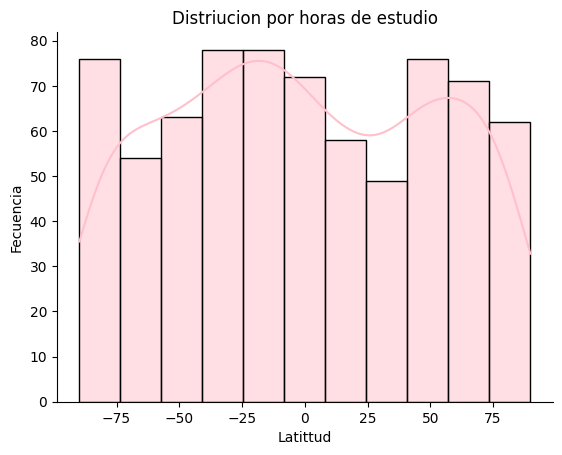

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Latitude'], kde = True, color = 'pink')
plt.xlabel('Latittud')
plt.ylabel('Fecuencia')
plt.title('Distriucion por horas de estudio')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


Longitude

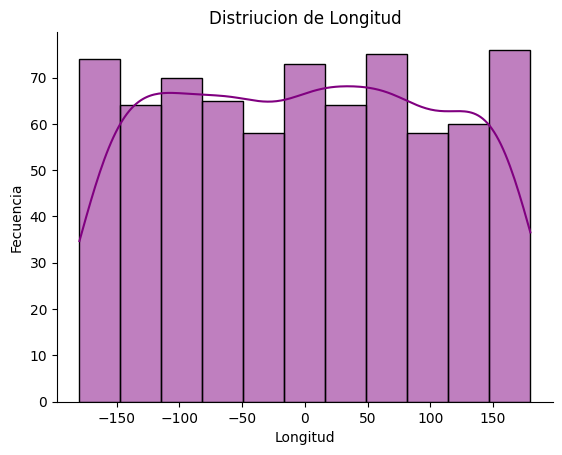

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Longitude'], kde = True, color = 'purple')
plt.xlabel('Longitud')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Longitud')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Inventory_Level

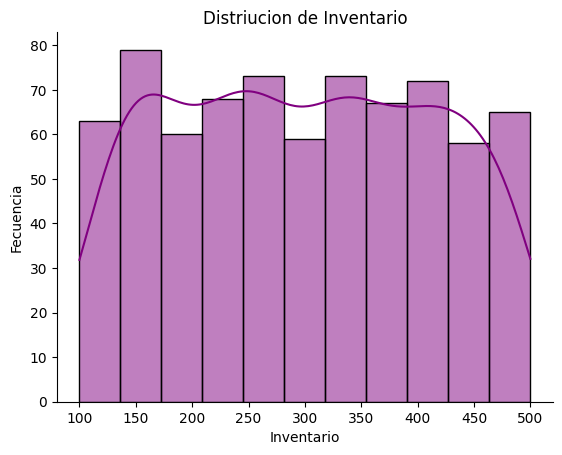

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Inventory_Level'], kde = True, color = 'purple')
plt.xlabel('Inventario')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Inventario')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Shipment_Status

In [ ]:
df["Shipment_Status"].unique()

array(['In Transit', 'Delivered', 'Delayed'], dtype=object)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Shipment_Status)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#no se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Shipment_Status),2.0,208.098709,104.049355,0.504002,0.604317
Residual,734.0,151531.456243,206.446126,NaN,NaN


In [ ]:
df.drop(columns = ["Shipment_Status"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Temperature

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Temperature)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Temperature),119.0,21204.060583,178.185383,0.842226,0.876205
Residual,617.0,130535.494370,211.564821,NaN,NaN


In [ ]:
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Humidity,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,54.3,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,52.3,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,64.2,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,57.3,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,63.6,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,62.8,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,64.1,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,70.0,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,77.9,Detour,56,276,7,Weather,83.7,272,0


Humidity

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Humidity)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Humidity),273.0,54928.590667,201.203629,0.96226,0.635462
Residual,463.0,96810.964286,209.094955,NaN,NaN


In [ ]:
df.drop(columns = ["Humidity"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Traffic_Status,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,Heavy,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,Heavy,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,Detour,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,Clear,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,Detour,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,Clear,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,Detour,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,Heavy,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,Detour,56,276,7,Weather,83.7,272,0


Traffic_Status

In [ ]:
df["Traffic_Status"].unique()

array(['Heavy', 'Detour', 'Clear'], dtype=object)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Traffic_Status)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(Traffic_Status),2.0,168.452231,84.226116,0.407874,0.665213
Residual,734.0,151571.102721,206.500140,NaN,NaN


In [ ]:
df.drop(columns = ["Traffic_Status"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,7,Weather,83.7,272,0


Waiting_Time

In [ ]:
df["Waiting_Time"].unique()

array([16, 37, 30, 52, 13, 38, 54, 45, 58, 21, 31, 20, 57, 35, 22, 14, 26,
       41, 39, 50, 19, 12, 40, 15, 17, 46, 55, 23, 49, 32, 34, 24, 51, 59,
       56, 25, 53, 29, 18, 43, 44, 42, 60, 36, 10, 48, 27, 33, 28, 47, 11])

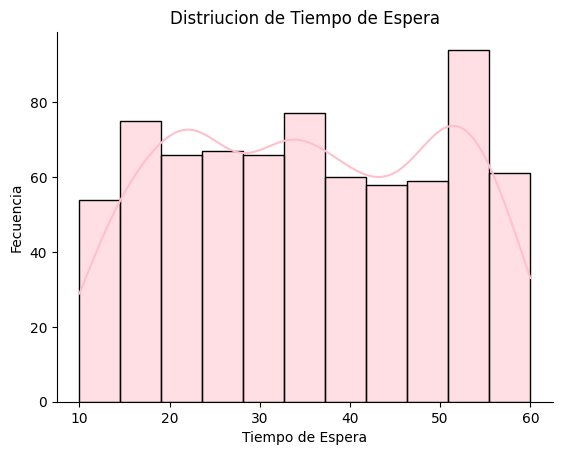

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Waiting_Time'], kde = True, color = 'pink')
plt.xlabel('Tiempo de Espera')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Tiempo de Espera')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [ ]:
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,User_Purchase_Frequency,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,7,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,5,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,9,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,7,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,10,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,10,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,32,307,10,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,1,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,7,Weather,83.7,272,0



User_Transaction_Amount

In [ ]:
df["User_Transaction_Amount"].unique()

array([439, 227, 459, 127, 406, 215, 320, 487, 298, 315, 174, 152, 396,
       354, 121, 220, 184, 392, 209, 235, 292, 475, 311, 201, 310, 379,
       274, 308, 232, 282, 258, 425, 424, 467, 139, 456, 205, 173, 154,
       191, 100, 193, 418, 378, 370, 496, 415, 167, 485, 344, 219, 486,
       214, 267, 451, 268, 244, 432, 366, 330, 410, 468, 225, 120, 377,
       335, 302, 416, 340, 145, 243, 180, 111, 187, 156, 421, 325, 189,
       138, 345, 246, 247, 204, 461, 499, 155, 261, 390, 464, 482, 312,
       447, 341, 106, 101, 226, 140, 413, 323, 238, 233, 181, 319, 490,
       321, 318, 257, 229, 497, 287, 266, 466, 358, 494, 305, 168, 210,
       481, 423, 231, 360, 419, 107, 195, 112, 309, 477, 146, 463, 103,
       170, 393, 367, 141, 104, 213, 242, 473, 389, 124, 332, 384, 448,
       317, 126, 216, 251, 363, 342, 108, 336, 495, 188, 236, 147, 295,
       197, 417, 125, 348, 347, 472, 498, 476, 414, 196, 259, 454, 202,
       437, 115, 409, 453, 134, 402, 484, 314, 151, 211, 349, 37

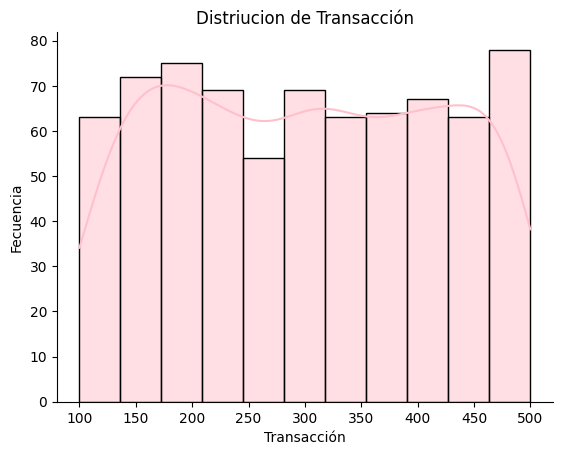

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['User_Transaction_Amount'], kde = True, color = 'pink')
plt.xlabel('Transacción')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Transacción')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

User_Purchase_Frequency

In [ ]:
df["User_Purchase_Frequency"].unique()

array([ 7,  5,  9, 10,  3,  4,  1,  2,  6,  8])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(User_Purchase_Frequency)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#Se rechaza la hipotesis nula

,df,sum_sq,mean_sq,F,PR(>F)
C(User_Purchase_Frequency),9.0,3144.428059,349.380895,1.709342,0.083103
Residual,727.0,148595.126893,204.394948,NaN,NaN


In [ ]:
df.drop(columns = ["User_Purchase_Frequency"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,Logistics_Delay_Reason,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,Weather,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,Traffic,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,Traffic,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,Mechanical Failure,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,Traffic,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,Weather,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,32,307,Traffic,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,Weather,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,Weather,83.7,272,0


Logistics_Delay_Reason

In [ ]:
df["Logistics_Delay_Reason"].unique()

array(['Weather', 'Traffic', 'Mechanical Failure'], dtype=object)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Logistics_Delay_Reason)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No hay evidencia suficiente

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay_Reason),2.0,430.598291,215.299145,1.044417,0.352419
Residual,734.0,151308.956662,206.142993,NaN,NaN


In [ ]:
df.drop(columns = ["Logistics_Delay_Reason"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,Asset_Utilization,Demand_Forecast,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,80.9,174,1
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,97.4,160,1
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,73.8,253,0
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,63.1,224,0
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,85.5,238,0
...,...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,95.6,221,1
994,Truck_1,44.2477,175.0702,143,21.6,32,307,64.0,168,0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,79.2,213,1
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,83.7,272,0


Asset_Utilization

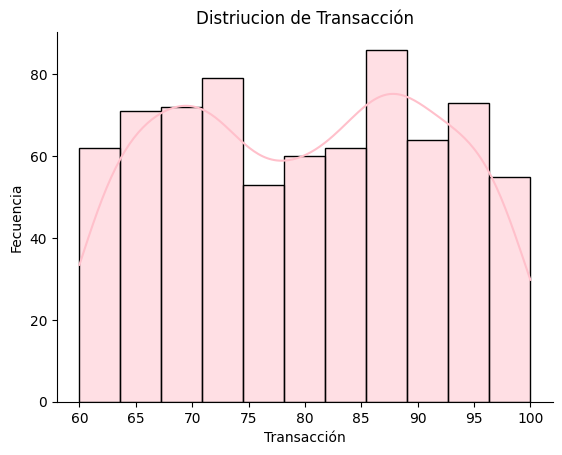

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Asset_Utilization'], kde = True, color = 'pink')
plt.xlabel('Transacción')
plt.ylabel('Fecuencia')
plt.title('Distriucion de Transacción')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Demand_Forecast

In [ ]:
df["Demand_Forecast"].unique()

array([174, 160, 253, 224, 238, 114, 231, 256, 170, 248, 195, 235, 135,
       282, 262, 101, 155, 240, 242, 205, 222, 266, 255, 129, 183, 209,
       113, 265, 154, 289, 143, 128, 127, 290, 169, 241, 236, 260, 182,
       212, 254, 264, 225, 204, 172, 245, 252, 211, 156, 151, 105, 125,
       214, 217, 165, 136, 233, 137, 150, 140, 298, 141, 263, 223, 285,
       273, 296, 100, 106, 284, 226, 149, 181, 109, 177, 184, 220, 111,
       281, 126, 110, 107, 294, 189, 152, 145, 270, 118, 230, 117, 115,
       191, 208, 166, 131, 277, 186, 272, 175, 158, 162, 138, 246, 179,
       201, 102, 257, 116, 130, 237, 112, 206, 286, 139, 147, 229, 249,
       269, 213, 271, 124, 279, 185, 292, 188, 200, 268, 221, 198, 261,
       104, 219, 259, 247, 146, 288, 133, 176, 228, 134, 234, 196, 197,
       123, 187, 251, 280, 132, 171, 192, 244, 300, 203, 122, 215, 297,
       199, 164, 103, 159, 163, 207, 168, 274, 173, 202, 291, 108, 180,
       142, 239, 299, 287, 283, 276, 157, 243, 119, 120, 190, 21

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Demand_Forecast)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No hay datos suficientes

,df,sum_sq,mean_sq,F,PR(>F)
C(Demand_Forecast),199.0,45875.589476,230.530600,1.169377,0.08601
Residual,537.0,105863.965476,197.139601,NaN,NaN


In [ ]:
df.drop(columns = ["Demand_Forecast"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,Asset_Utilization,Logistics_Delay
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,80.9,1
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,97.4,1
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,73.8,0
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,63.1,0
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,85.5,0
...,...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,95.6,1
994,Truck_1,44.2477,175.0702,143,21.6,32,307,64.0,0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,79.2,1
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,83.7,0


Logistics_Delay

In [ ]:
df["Logistics_Delay"].unique()

array([1, 0])

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols("Waiting_Time ~ C(Logistics_Delay)",data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Logistics_Delay),1.0,532.543800,532.543800,2.588635,0.108062
Residual,735.0,151207.011153,205.723825,NaN,NaN


In [ ]:
df.drop(columns = ["Logistics_Delay"], inplace = True)
df

,Asset_ID,Latitude,Longitude,Inventory_Level,Temperature,Waiting_Time,User_Transaction_Amount,Asset_Utilization
1,Truck_6,22.2748,-131.7086,491,22.5,16,439,80.9
3,Truck_9,42.3900,-1.4788,330,25.4,37,227,97.4
7,Truck_9,46.5643,-126.5348,222,23.3,30,459,73.8
9,Truck_2,54.1683,-135.2676,389,21.9,52,127,63.1
11,Truck_10,-25.2768,156.1262,234,29.7,13,406,85.5
...,...,...,...,...,...,...,...,...
993,Truck_4,46.9729,-36.5198,420,21.6,31,242,95.6
994,Truck_1,44.2477,175.0702,143,21.6,32,307,64.0
995,Truck_6,89.8701,73.6867,264,26.9,32,188,79.2
996,Truck_5,-10.4792,-177.1239,479,23.7,56,276,83.7


Mapa de calor

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

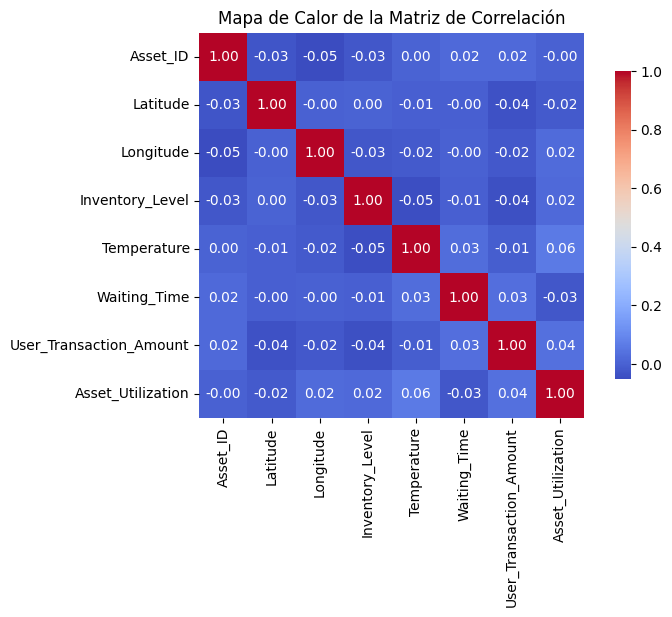

In [ ]:
df['Asset_ID'] = pd.factorize(df['Asset_ID'])[0]

correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de la Matriz de Correlación')

Coeficiente de correlacion: -0.0109



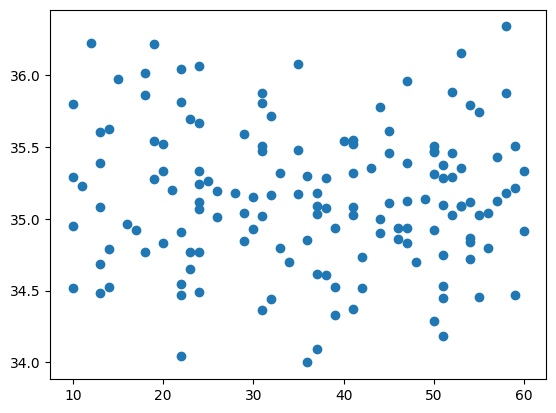

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['Latitude',	'Longitude',	'Inventory_Level',	'Temperature']]
Y = df["Waiting_Time"]

# Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

In [ ]:
b0, b1, b2, b3, b4 = modelo.params

Fun = lambda x1, x2, x3, x4: b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4


Fun(432, 60, 2, 120000)

13035.647927918895

In [ ]:
from statsmodels.formula.api import ols

moedo_2 = ols(formula = "Waiting_Time ~ Latitude + Longitude + Inventory_Level + Temperature", data = df).fit()
tabla_anova = sm.stats.anova_lm(moedo_2, typ = 2)
tabla_anova

,sum_sq,df,F,PR(>F)
Latitude,2.349989,1.0,0.011346,0.915202
Longitude,0.000397,1.0,0.000002,0.998896
Inventory_Level,2.526366,1.0,0.012197,0.912090
Temperature,115.063561,1.0,0.555520,0.456310
Residual,151617.470315,732.0,NaN,NaN


El valor P (PR(>F)) indica la probabilidad de los resultados si la variable independiente no tuviera efecto.

Un valor P menor a 0.05 suele indicar significancia estadística, sugiriendo que la variable independiente afecta al tiempo de espera.

En este caso, los valores P para latitud, longitud, inventario y temperatura son mucho mayores que 0.05, lo que significa que ninguna afecta significativamente el tiempo de espera.

Dado que los valores P de estas variables son muy superiores a 0.05, ninguna influye de manera relevante en el tiempo de espera.

Se deben considerar otras variables o técnicas de modelado para mejorar la predicción. La frase NaN no es un numero en el Residual no sirve para comparar variables.